<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/cv2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


fatal: destination path 'mit2020' already exists and is not an empty directory.


TEST1-facedetection



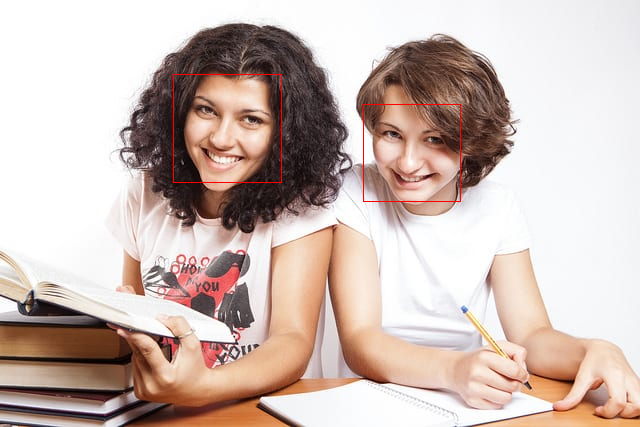



TEST2-facedetection



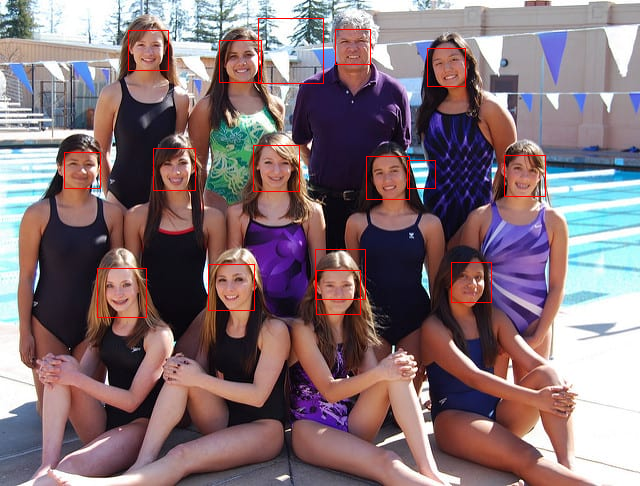





TEST1-showface

1/1 [==============================] - 0s 196ms/step



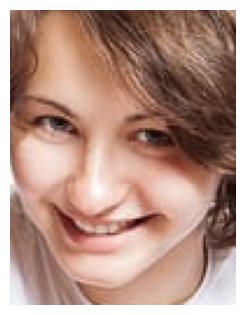

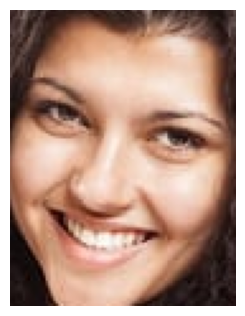





TEST2-showface

3/3 [==============================] - 0s 44ms/step



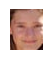

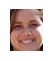

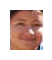

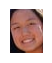

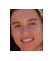

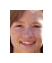

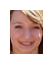

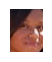

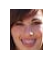

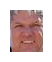

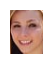

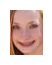

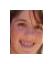





Your processing time with cpu is 13.554798864000077



In [5]:
# https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

import time
start = time.perf_counter()

print()

#!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/frank-morales2020/mit2020.git
print()

import cv2
# plot photo with detected faces using opencv cascade classifier
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle

def face_detection(filename):

    # load the photograph
    pixels = imread(filename)

    # load the pre-trained model
    classifier = cv2.CascadeClassifier('/content/mit2020/haarcascade_frontalface_default.xml')

    # perform face detection
    bboxes = classifier.detectMultiScale(pixels)
    # print bounding box for each detected face
    for box in bboxes:
        # extract
        x, y, width, height = box
        x2, y2 = x + width, y + height
        # draw a rectangle over the pixels
        rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
        # show the image

    from google.colab.patches import cv2_imshow
    cv2_imshow(pixels)
    #imshow('face detection', pixels)

    # keep the window open until we press a key
    waitKey(0)

    # close the window
    destroyAllWindows()

print()
print('TEST1-facedetection')
print()
filename='/content/mit2020/test1.jpg'
face_detection(filename)
print()

print()
print('TEST2-facedetection')
print()
filename='/content/mit2020/test2.jpg'
face_detection(filename)
print()

print()
!pip install mtcnn
print()

# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw each face separately
def draw_faces(filename, result_list):
 # load the image
 data = pyplot.imread(filename)

 # plot each face as a subplot
 for i in range(len(result_list)):
      print()
      # get coordinates
      x1, y1, width, height = result_list[i]['box']
      x2, y2 = x1 + width, y1 + height
      # define subplot
      pyplot.subplot(1, len(result_list), i+1)
      pyplot.axis('off')
      # plot face
      pyplot.imshow(data[y1:y2, x1:x2])
      # show the plot
      pyplot.show()
      print()

def show_faces(filename):
      print()
      # load image from file
      pixels = pyplot.imread(filename)

      # create the detector, using default weights
      detector = MTCNN()

      # detect faces in the image
      faces = detector.detect_faces(pixels)

      # display faces on the original image
      draw_faces(filename, faces)
      print()

print()
print('TEST1-showface')
filename='/content/mit2020/test1.jpg'
show_faces(filename)
print()


print()
print('TEST2-showface')
filename='/content/mit2020/test2.jpg'
show_faces(filename)
print()

end = time.perf_counter()
final = end - start

import torch
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print()
print('Your processing time with %s is %s'%(device,final))
print()
